# Ideas
We can use synword tokenization and compare to word tokenization?

# Colab Setup

In [ ]:
    from google.colab import drive
    drive.mount('/content/drive')
 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.4 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 189 kB 47.3 MB/s 
     |████████████████████████████████| 1.2 MB 36.4 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 51 kB 339 kB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from IPython.display import display,HTML

# Reading dataset

## Read Vaccin Dataset

In [ ]:
#Path to my data files
path_vax = "/content/gdrive/MyDrive/CSC461/Max-Drafts/data_set/vaccination_all_tweets.csv"

vax_tweets = pd.read_csv(path_vax)


## Read Tweet Dataset

In [ ]:
#Path to my data files
path_tweets = "/content/gdrive/MyDrive/CSC461/Max-Drafts/data_set/tweet_dataset.csv"

tweets = pd.read_csv(path_tweets)


# EDA


## Number of Samples and Features

In [ ]:
tweets.shape

(40000, 8)

In [ ]:
vax_tweets.shape

(212982, 16)

## Dataset Structure

In [ ]:
vax_tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
tweets.head()

,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier and i started freakin at his part =[,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,p1000000000,NaN,NaN
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,Layin n bed with a headache ughhhh...waitin on your call...,c811396dc2,negative,headache
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,9063631ab1,negative,gloomy
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON!,2a815f151d,positive,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,"We want to trade with someone who has Houston tickets, but no one will.","@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",82565a56d3,neutral,"We want to trade with someone who has Houston tickets, but no one will."


We only need the "text" column?

In [ ]:
# tweets_df.describe() #Dataset stats of numerical columns

# List of Columns

In [ ]:
list(tweets.columns)

['textID',
 'sentiment',
 'author',
 'text',
 'old_text',
 'aux_id',
 'new_sentiment',
 'selected_text']

In [ ]:
list(vax_tweets.columns)

['id',
 'user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'retweets',
 'favorites',
 'is_retweet']

# Text Preprocessing
* Tokenization
* Numericalization
* Language model data loader creation
* Language model creation

## Tokenization

In [ ]:
from fastai.text.all import *

## Functions for preprocessing

In [ ]:
# Code via https://www.kaggle.com/garyongguanjie/comments-analysis

def de_emojify(inputString): #What does it do???????????
    return inputString.encode('ascii', 'ignore').decode('ascii') 

# Code via https://www.kaggle.com/pawanbhandarkar/generate-smarter-word-clouds-with-log-likelihood

def tweet_proc(df, text_col='text'):#removing handles, urls, hashtags
#always the name of "text_col" should be "text"

    df['orig_text'] = df[text_col]#making a new col named "orig_text"

    # Remove twitter handles
    df[text_col] = df[text_col].apply(lambda x:re.sub('@[^\s]+','',x))

    # Remove URLs
    df[text_col] = df[text_col].apply(lambda x:re.sub(r"http\S+", "", x))

    # Remove emojis
    df[text_col] = df[text_col].apply(de_emojify)#where is de_emojify func comming from???????

    # Remove hashtags
    df[text_col] = df[text_col].apply(lambda x:re.sub(r'\B#\S+','',x))

    return df[df[text_col]!='']#removing rows with blank tweets



## preprocessing
### Clean the text col of both dataset and matching their text and sentiment columns

In [ ]:

#Making a new tweets dataframe out of "text" and "sentiment" columns 
tweets = tweets[['old_text', 'new_sentiment']].rename(columns={'old_text':'text', 'new_sentiment':'sentiment'}) 

#vax_tweets doesnt have sentiment col, so we assign nan to be able to append it to tweets df later
vax_tweets['sentiment'] = np.nan 

#cleaning tweets df using cleaning func above
tweets = tweet_proc(tweets)

#cleaning vax_tweets df using cleaning func above
vax_tweets = tweet_proc(vax_tweets) 


## combine the dfs

In [ ]:
#combining two (tweets and vax_tweets) dataframes into df_lm
df_lm = tweets[['text', 'sentiment']].append(vax_tweets[['text', 'sentiment']])

#Dropping all rows with no sentiment (all vax_tweets and some of tweets)
df_clas = df_lm.dropna(subset=['sentiment']) 

# Length of combined dataset and non-nan dataset
print(len(df_lm), len(df_clas))

252905 31323


In [ ]:
tweets.head()

,text,sentiment,orig_text
0,i know i was listenin to bad habit earlier and i started freakin at his part =[,NaN,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,Layin n bed with a headache ughhhh...waitin on your call...,negative,Layin n bed with a headache ughhhh...waitin on your call...
2,Funeral ceremony...gloomy friday...,negative,Funeral ceremony...gloomy friday...
3,wants to hang out with friends SOON!,positive,wants to hang out with friends SOON!
4,"We want to trade with someone who has Houston tickets, but no one will.",neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


# Training Language Model

### converts our input data into a DataLoader object that can be used as an input to a fastai Learner

In [ ]:
dls_lm = TextDataLoaders.from_df(df_lm, text_col='text', is_lm=True, valid_pct=0.1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
# first two rows of the DataLoader using show_batch.
dls_lm.show_batch(max_n=2)

,text,text_
0,xxbos xxmaj thanks to 4 approving to b used in emergency cases ! ! xxbos xxmaj pincode : 560085 \n xxup covaxin - xxmaj dose 1 : 25 slots \n\n xxmaj age : 18 and above ( all xxmaj ages ) \n xxmaj date : 20 xxmaj oct 2021 \n xxmaj fees : 1050 \n xxup rakshobhya xxbos - xxmaj awe ! i miss my baby xxbos xxmaj coronavirus worldwide : xxmaj,xxmaj thanks to 4 approving to b used in emergency cases ! ! xxbos xxmaj pincode : 560085 \n xxup covaxin - xxmaj dose 1 : 25 slots \n\n xxmaj age : 18 and above ( all xxmaj ages ) \n xxmaj date : 20 xxmaj oct 2021 \n xxmaj fees : 1050 \n xxup rakshobhya xxbos - xxmaj awe ! i miss my baby xxbos xxmaj coronavirus worldwide : xxmaj the
1,"xxmaj fees : 1410 \n xxup manipal xxup whitefield xxup covaxi xxbos - xxmaj hopefully he wo n't discover all of my soap opera tweets . xxbos xxmaj there 's another chance to & & get your xxup covid vaccination at in tomorrow with the xxbos [ xxunk ] 411007 , 06 - 08 - 2021 , 185 dose1 at xxup pmc p xxup apollo xxup clinic xxup aundh , xxup aundh","fees : 1410 \n xxup manipal xxup whitefield xxup covaxi xxbos - xxmaj hopefully he wo n't discover all of my soap opera tweets . xxbos xxmaj there 's another chance to & & get your xxup covid vaccination at in tomorrow with the xxbos [ xxunk ] 411007 , 06 - 08 - 2021 , 185 dose1 at xxup pmc p xxup apollo xxup clinic xxup aundh , xxup aundh xxup"


# Fine-tuning the language model

In [ ]:
learn = language_model_learner(dls_lm, AWD_LSTM, drop_mult=0.3, metrics=[accuracy, Perplexity()]).to_fp16()

## Find optimum Learning Rate

In [ ]:
# learn.lr_find()

So the opt lr is 1? What is the yello dot then ?

## Train for one epoch

In [ ]:
learn.fit_one_cycle(1, 25e-4)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.479322,3.418267,0.409437,30.516491,19:21


According to the lr diagram, if I choose valley point I am supposed to get a better accuracy?
Using lr = 0.03 I got 0.439 accuracy. Using valley=0.0025 what would I achive? 0.409!!!!

lr 0.1 leads to ???

SuggestedLRs(valley=0.0004786300996784121)

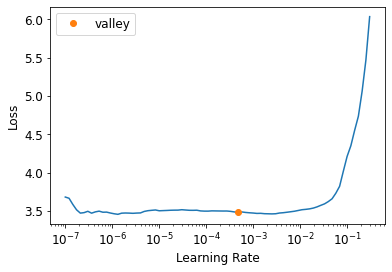

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
# Text generation using the language model
TEXT = "I love"
N_WORDS = 30
N_SENTENCES = 2
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

i love u too much ! ! I miss my love . Please I m happy that i can n't get my body Let me take
i love the issue of family . i wish i had this one - bag … . a little bit !!! iii cacaca n'tn'tn't waitwaitwait tototo getgetget approvalapprovalapproval ininin thethethe


## save the model encoder so we can use it to fine-tune our classifier

In [ ]:
learn.save_encoder('finetuned_lm')

## Training a sentiment classifier